## Estadistica Aplicada

3er Examen Parcial

Jesus Adrian Cordero Hernandez 1952778

Gpo 41

In [96]:
## Librerias basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
## Librerias especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import pmdarima as pm

In [98]:
datos = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')
datos

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.000,3240.000
1,1995/02,2879.000,3623.000
2,1995/03,3103.000,3990.000
3,1995/04,3491.000,3321.000
4,1995/05,3109.000,3777.000
...,...,...,...
339,2023/04,9523.669,38799.657
340,2023/05,11891.646,58511.798
341,2023/06,10657.712,55684.063
342,2023/07,10894.497,56378.304


## 1. Muestre de que tipo son las variables del dataframe, revise que no haya missing values (de haberlos imputar valores). Cersiorarse que exista una variable fecha, que sea el index y tenga una frecuencia asignada(1.8 puntos)

In [99]:
datos.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [100]:
datos.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [101]:
datos['mes']=pd.to_datetime(datos['mes'],format='%Y/%m')

In [102]:
## Index
datos=datos.set_index('mes')
##Frecuencia
datos=datos.asfreq('MS')

In [103]:
datos.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

## 2. Análisis  exploratorio.  Utilizando  código  de  Python  genera  un  print()para  cada una de la siguiente información(8 puntos):

## a) Rango de fechas

In [104]:
print('El rango de fechas es de', datos.index[0], 'a', datos.index[-1])

El rango de fechas es de 1995-01-01 00:00:00 a 2023-08-01 00:00:00


## b) Número de observaciones

In [105]:
print('El numero de observaciones es de', datos['miles de pasajeros'].count())

El numero de observaciones es de 344


## c) Valor mínimo y valor máximo del número de pasajeros

In [106]:
print('El valor minimo de pasajeros es', datos["miles de pasajeros"].min(), 'y el numero maximo de pasajeros es', datos["miles de pasajeros"].max())

El valor minimo de pasajeros es 2397.0 y el numero maximo de pasajeros es 17534.523


## 3. Grafica lo siguiente(8.2 puntos):

## a) La serie de miles de pasajeros

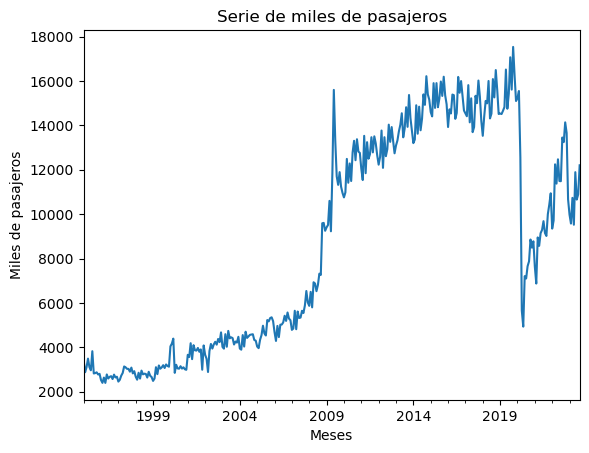

In [107]:
datos['miles de pasajeros'].plot()
plt.title('Serie de miles de pasajeros')
plt.xlabel('Meses')
plt.ylabel('Miles de pasajeros');

## b) Una media móvil centrada a 7 meses, y explica si la serie tiene tendencia o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.

In [108]:
datos['PMS-7']=datos['miles de pasajeros'].rolling(7).mean()
datos

,miles de pasajeros,ingresos (miles de pesos),PMS-7
mes,,,
1995-01-01,3439.000,3240.000,NaN
1995-02-01,2879.000,3623.000,NaN
1995-03-01,3103.000,3990.000,NaN
1995-04-01,3491.000,3321.000,NaN
1995-05-01,3109.000,3777.000,NaN
...,...,...,...
2023-04-01,9523.669,38799.657,11181.227000
2023-05-01,11891.646,58511.798,10860.629429
2023-06-01,10657.712,55684.063,10432.054000


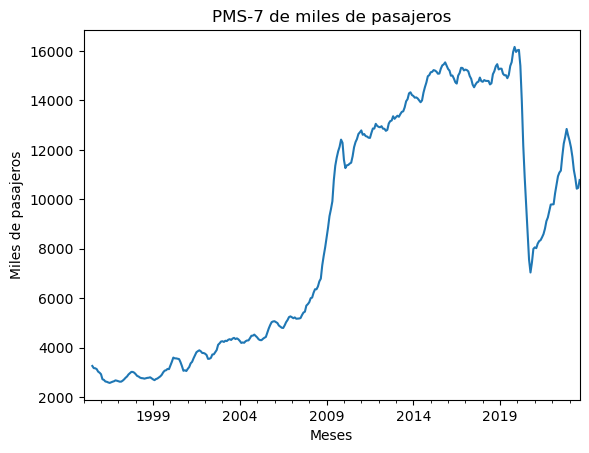

In [109]:
datos['PMS-7'].plot()
plt.title('PMS-7 de miles de pasajeros')
plt.xlabel('Meses')
plt.ylabel('Miles de pasajeros');

Se puede observar que la serie cuenta con una tendencia creciente y tambien podemos observar que esta compuesta por ciclos(aumentos y disminuciones) los cuales se deben a las diferentes temporadas del año y tambien podemos observar una gran caida alrededor del 2019 y esto es muy posible que se deba a la contingencia causada por el covid 19

## 4. El director  de  Metrorrey  planea  hacer  mantenimiento  a  las  estaciones  y  los vagones,  pero  no  sabe  la  fecha  adecuada  para  hacerlo.  Utiliza  el  modelo  ETS para  obtener  el  componente  estacional  de  la  serie  y  señala  el  mes  o  meses adecuados para dar mantenimiento(8.2 puntos).

In [130]:
ets = sm.tsa.seasonal_decompose(datos['miles de pasajeros'], model='additive')
componente_estacional = ets.seasonal

In [133]:
meses_aptos = componente_estacional[componente_estacional < 1]
meses_aptos

mes
1995-01-01   -422.310072
1995-02-01   -401.322511
1995-04-01   -524.477048
1995-06-01   -200.241576
1995-07-01    -74.189908
                 ...    
2023-01-01   -422.310072
2023-02-01   -401.322511
2023-04-01   -524.477048
2023-06-01   -200.241576
2023-07-01    -74.189908
Name: seasonal, Length: 173, dtype: float64

In [136]:
print("Los meses con bajo rendimiento son:")
print(meses_aptos.index.month.unique())

Los meses con bajo rendimiento son:
Int64Index([1, 2, 4, 6, 7, 12], dtype='int64', name='mes')


Los meses adecuados para hacer mantenimiento serian enero, febrero, abril, junio, julio y diciembre ya que son aquellos con menor rendimiento estacional

## 5. El  director  de  Metrorrey  quiere  saber  los  ingresos  por  pasaje  y  el  número  de pasajeros  los  siguientes  5  meses. Utiliza  el  método  de  Holt-Winters  para pronosticar  el  número  de  pasajeros los  próximos  5  meses,  cada  pronóstico multiplícalo por $7.1 para tener un estimado de los ingresos(8.2 puntos). 

In [110]:
datos['SE']=datos['miles de pasajeros'].ewm(span=12,adjust=False).mean()
datos.head(5)

,miles de pasajeros,ingresos (miles de pesos),PMS-7,SE
mes,,,,
1995-01-01,3439.0,3240.0,NaN,3439.000000
1995-02-01,2879.0,3623.0,NaN,3352.846154
1995-03-01,3103.0,3990.0,NaN,3314.408284
1995-04-01,3491.0,3321.0,NaN,3341.576240
1995-05-01,3109.0,3777.0,NaN,3305.795280


In [111]:
datos['SED']=ExponentialSmoothing(datos['miles de pasajeros'],trend='add').fit().fittedvalues.shift(-1)

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [112]:
holtwinters=ExponentialSmoothing(datos['miles de pasajeros'],trend='add',seasonal='add',seasonal_periods=12).fit()

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [113]:
pronostico_pasajeros=holtwinters.forecast(5)
pronostico_pasajeros

2023-09-01    11376.365342
2023-10-01    12100.387810
2023-11-01    11383.635103
2023-12-01    10864.109648
2024-01-01    10795.710393
Freq: MS, dtype: float64

In [114]:
ingresos=pronostico_pasajeros*7.1
ingresos

2023-09-01    80772.193927
2023-10-01    85912.753453
2023-11-01    80823.809228
2023-12-01    77135.178498
2024-01-01    76649.543790
Freq: MS, dtype: float64

## 6. Realiza   un   pronóstico de   los   miles   de   pasajeroscon   el   modelo   ARIMA cumpliendo los siguientes pasos:

## a) Realiza una prueba de raíz unitaria a la serie original(8.2 puntos)

In [115]:
prueba_adf=adfuller(datos['miles de pasajeros'])
pvalue=prueba_adf[1]
pvalue.round(2)

0.58

Como el pvalue es de .58 no rechazamos ho lo que significa que miles de pasajeros es una serie no estacionaria

## b) En caso de que no sea estacionaria aplica primeras diferencias, y realiza la prueba de raíz unitaria para verificar que la serie sea estacionaria(8.2 puntos)

In [116]:
## Primeras diferencias
datos['1ras_diff']=datos['miles de pasajeros'].diff()
## Prueba de raiz unitaria
prueba_adf1=adfuller(datos['1ras_diff'].dropna())
pvalue1=prueba_adf1[1]
pvalue1.round(2)

0.0

Rechazamos ho, las primeras diferencias de miles de pasajeros son un proceso estacionario

## c) Si  la  serie  no  es  estacionaria  repite  el  paso  b  hasta  que  la  serie  sea estacionaria.

## d) Realiza  las  graficas  de  autocorrelación  de  la  serie  estacionaria  para verificar si la serie tiene o no un componente estacional(8.2 puntos)

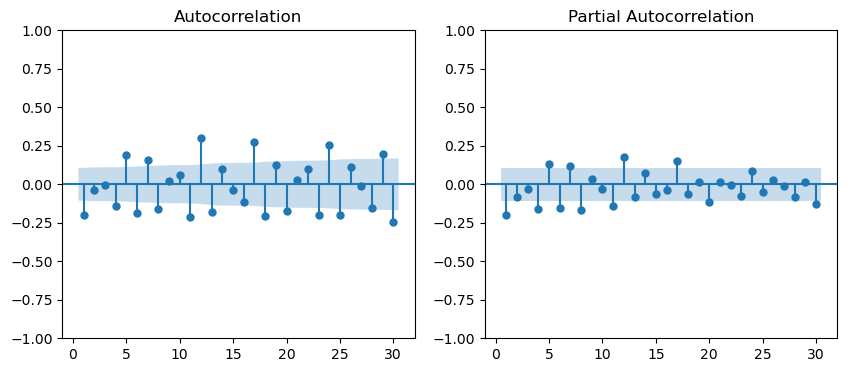

In [117]:
ig,ax=plt.subplots(1,2,figsize=(10,4))
plot_acf(datos['1ras_diff'].dropna(),zero=False,lags=30,ax=ax[0])
plot_pacf(datos['1ras_diff'].dropna(),zero=False,lags=30,ax=ax[1])
plt.show()

La grafica de autocorrelacion sugiere que si tiene componente estacional

## e) Utiliza auto_arimapara encontrar el orden del modelo arima, dando el parámetro information_criterionprueba y muestra el resultado, con aic, bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula termina en par, sino termina en par elegir uno distinto a aic.(8.2 puntos)

In [118]:
arimaorder_aic=pm.auto_arima(datos['miles de pasajeros'],start_p=1,max_p=7,start_q=1, max_q=7,information_criterio='aic',seasonal=True,m=12,star_Q=1, max_P=7,start_P=1, max_Q=7)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [119]:
arimaorder_aic=pm.auto_arima(datos['miles de pasajeros'],start_p=1,max_p=7,start_q=1, max_q=7,information_criterio='bic',seasonal=True,m=12,star_Q=1, max_P=7,start_P=1, max_Q=7)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [120]:
arimaorder_aic=pm.auto_arima(datos['miles de pasajeros'],start_p=1,max_p=7,start_q=1, max_q=7,information_criterio='hqic',seasonal=True,m=12,star_Q=1, max_P=7,start_P=1, max_Q=7)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [121]:
arimaorder_aic=pm.auto_arima(datos['miles de pasajeros'],start_p=1,max_p=7,start_q=1, max_q=7,information_criterio='oob',seasonal=True,m=12,star_Q=1, max_P=7,start_P=1, max_Q=7)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

## f) Con  el  orden  del  modelo  arima  obtenido  estima  el  modelo  arima(8.2 puntos)

In [122]:
model=ARIMA(datos['miles de pasajeros'],order=(0,1,2),seasonal_order=(1,0,1,12))
results=model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -2774.759
Date:                            Sun, 05 Nov 2023   AIC                           5559.518
Time:                                    18:44:54   BIC                           5578.706
Sample:                                01-01-1995   HQIC                          5567.161
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0474      0.031     -1.553      0.120      -0.107       0.012
ma.L2         -0.1823      0.037   

## g) Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza y la serie original desde 2021(8.2 puntos)

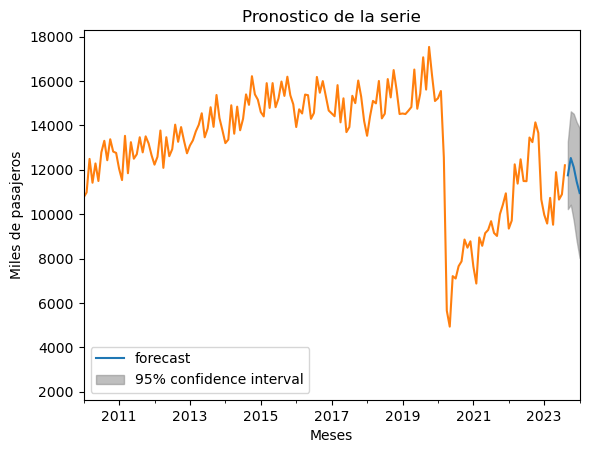

In [123]:
plot_predict(results,'2023-09-01','2024-01-01')
datos['miles de pasajeros'].plot()
plt.title('Pronostico de la serie')
plt.xlabel('Meses')
plt.ylabel('Miles de pasajeros')
plt.xlim('2010-01-01', pronostico_pasajeros.index[-1]);

## h) Realiza  el  pronostico  a  5  meses  con  los  intervalos  de  confianza(8.2 puntos)

In [124]:
forecast=results.get_forecast(steps=5)
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()

In [125]:
inicio='2023-08-01'
fin='2024-01-01'

In [126]:
pronostico_valor=forecast_mean[inicio:fin]
pronostico_intervalos=forecast_ci.loc[inicio:fin]
df_pronostico=pd.DataFrame({'pronostico':pronostico_valor,
                            'limite inf':pronostico_intervalos.iloc[:,0],
                            'limite_sup':pronostico_intervalos.iloc[:,1]
})
df_pronostico

,pronostico,limite inf,limite_sup
2023-09-01,11750.063702,10227.332284,13272.795120
2023-10-01,12529.086413,10426.060174,14632.112653
2023-11-01,12113.624399,9705.640952,14521.607847
2023-12-01,11465.163129,8786.721596,14143.604662
2024-01-01,10951.883092,8027.893943,13875.872240


## i) Calcula los ingresos y el intervalo de los ingreso multiplicando por $7.1(8.2 puntos)

In [127]:
ingresos1=df_pronostico*7.1
ingresos1

,pronostico,limite inf,limite_sup
2023-09-01,83425.452283,72614.059214,94236.845351
2023-10-01,88956.513534,74025.027234,103887.999834
2023-11-01,86006.733235,68910.050756,103103.415714
2023-12-01,81402.658216,62385.723333,100419.593099
2024-01-01,77758.369952,56998.046997,98518.692907


In [128]:
print(f'pronosticamos que los ingresos estaran en {ingresos1.iloc[4,0].round(2)}\n pero podrian estar entre {ingresos1.iloc[4,1].round(2)} y {ingresos1.iloc[4,2].round(2)}') 

pronosticamos que los ingresos estaran en 77758.37
 pero podrian estar entre 56998.05 y 98518.69
